# SnV117 Energy Structure

Plot ground and excited state energy levels vs magnetic field.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import hamiltonian_qutip as ham
import parameters_qutip as params
%matplotlib inline


# Sweep B field intensity at a certain direction

In [2]:
# Parameters
# Magnetic field in Tesla
B_Tesla = np.linspace(0, 0.3, 200)  # [Tesla] Magnetic field sweep

# Conversion factor: g_e * mu_B in GHz/T
# mu_B = 13.996 GHz/T (Bohr magneton in frequency units)
# g_e ≈ 2 for electron
mu_B_GHz_per_T = 13.996  # [GHz/T]
g_e = 2.0

# Convert B from Tesla to GHz
B = g_e * mu_B_GHz_per_T * B_Tesla  # [GHz]

# B field direction (spherical coordinates)
theta = 0  # polar angle from z-axis [radians]
phi = 0    # azimuthal angle in xy-plane [radians]

# Strain parameters
alpha = 400  # [GHz] strain Ex
beta = 0   # [GHz] strain Ey

# Solve ground state
E_gnd, Eref_gnd, _, _, _ = ham.solve_hamiltonian(
    B, theta, phi,
    params.q, params.Aperp_gnd, params.Apar_gnd, params.L, alpha, beta
)

# Solve excited state  
E_exc, Eref_exc, _, _, _ = ham.solve_hamiltonian(
    B, theta, phi,
    params.q_exc, params.Aperp_exc, params.Apar_exc, params.L_exc, alpha, beta
)

print(f"B field: {len(B)} points from 0 to {B_Tesla[-1]} T ({B[-1]:.2f} GHz)")
print(f"theta = {theta:.4f} rad, phi = {phi:.4f} rad")
print(f"E_gnd shape: {E_gnd.shape}")


B field: 200 points from 0 to 0.3 T (8.40 GHz)
theta = 0.0000 rad, phi = 0.0000 rad
E_gnd shape: (200, 8)


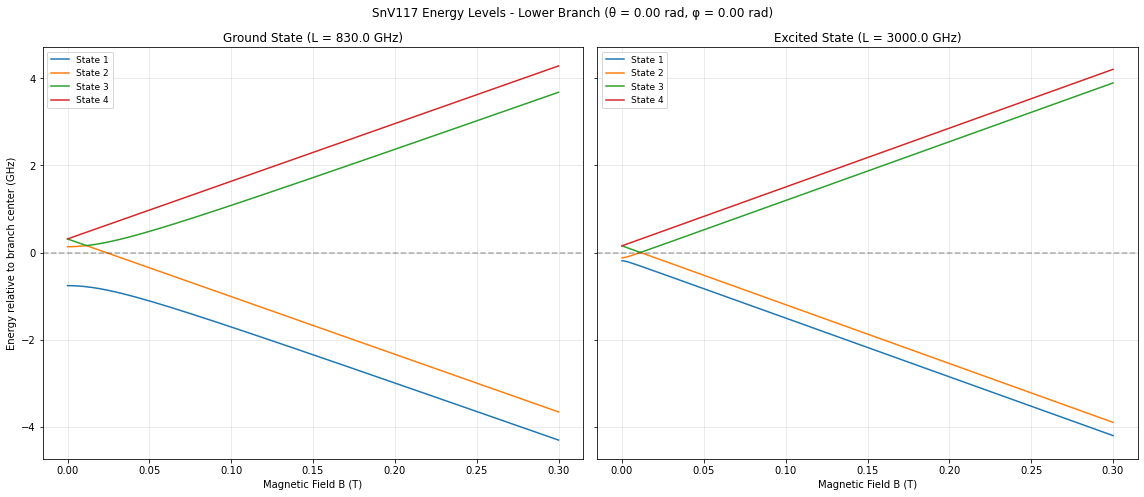

Ground state branch center: -576.390 GHz
Excited state branch center: -1552.417 GHz


In [3]:
# Plot ground and excited state energy levels side by side
# Select 4 lowest states (lower orbital branch) for each
lower_gnd_indices = np.argsort(E_gnd[0, :])[:4]  # 4 lowest energy states at B=0
lower_exc_indices = np.argsort(E_exc[0, :])[:4]  # 4 lowest energy states at B=0

# Extract the lower branch energies
E_gnd_lower = E_gnd[:, lower_gnd_indices]
E_exc_lower = E_exc[:, lower_exc_indices]

# Center at the branch center frequency (mean of the 4 states at B=0)
gnd_center = np.mean(E_gnd_lower[0, :])
exc_center = np.mean(E_exc_lower[0, :])

E_gnd_centered = E_gnd_lower - gnd_center
E_exc_centered = E_exc_lower - exc_center

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7), sharey=True)

# Ground state plot (centered)
for i in range(4):
    ax1.plot(B_Tesla, E_gnd_centered[:, i], '-', linewidth=1.5, label=f'State {lower_gnd_indices[i]+1}')
ax1.set_xlabel('Magnetic Field B (T)')
ax1.set_ylabel('Energy relative to branch center (GHz)')
ax1.set_title(f'Ground State (L = {params.L} GHz)')
ax1.legend(loc='best', fontsize=9)
ax1.grid(True, alpha=0.3)
ax1.axhline(y=0, color='k', linestyle='--', alpha=0.3)

# Excited state plot (centered)
for i in range(4):
    ax2.plot(B_Tesla, E_exc_centered[:, i], '-', linewidth=1.5, label=f'State {lower_exc_indices[i]+1}')
ax2.set_xlabel('Magnetic Field B (T)')
ax2.set_title(f'Excited State (L = {params.L_exc} GHz)')
ax2.legend(loc='best', fontsize=9)
ax2.grid(True, alpha=0.3)
ax2.axhline(y=0, color='k', linestyle='--', alpha=0.3)

fig.suptitle(f'SnV117 Energy Levels - Lower Branch (θ = {theta:.2f} rad, φ = {phi:.2f} rad)', fontsize=12)
plt.tight_layout()
plt.show()

print(f"Ground state branch center: {gnd_center:.3f} GHz")
print(f"Excited state branch center: {exc_center:.3f} GHz")


# Sweep B field direction with a fixed intensity

In [4]:
# Theta sweep at fixed B field
# Parameters
B_fixed_Tesla = 0.3  # [Tesla] Fixed magnetic field
B_fixed = g_e * mu_B_GHz_per_T * B_fixed_Tesla  # [GHz]

# Sweep theta from 0 to 2*pi
thetas = np.linspace(0, 2*np.pi, 200)
phi_fixed = np.pi/4  # arbitrary fixed phi

# Strain parameters (same as above)
alpha_theta = alpha
beta_theta = beta

# Arrays to store energies
E_gnd_theta = np.zeros((len(thetas), 8))
E_exc_theta = np.zeros((len(thetas), 8))

# Solve for each theta
for i, th in enumerate(thetas):
    E_gnd_theta[i, :], _, _, _, _ = ham.solve_hamiltonian(
        np.array([B_fixed]), th, phi_fixed,
        params.q, params.Aperp_gnd, params.Apar_gnd, params.L, alpha_theta, beta_theta
    )
    E_exc_theta[i, :], _, _, _, _ = ham.solve_hamiltonian(
        np.array([B_fixed]), th, phi_fixed,
        params.q_exc, params.Aperp_exc, params.Apar_exc, params.L_exc, alpha_theta, beta_theta
    )

print(f"Theta sweep: {len(thetas)} points from 0 to 2π")
print(f"B = {B_fixed_Tesla} T ({B_fixed:.2f} GHz), φ = {phi_fixed:.4f} rad")


Theta sweep: 200 points from 0 to 2π
B = 0.3 T (8.40 GHz), φ = 0.7854 rad


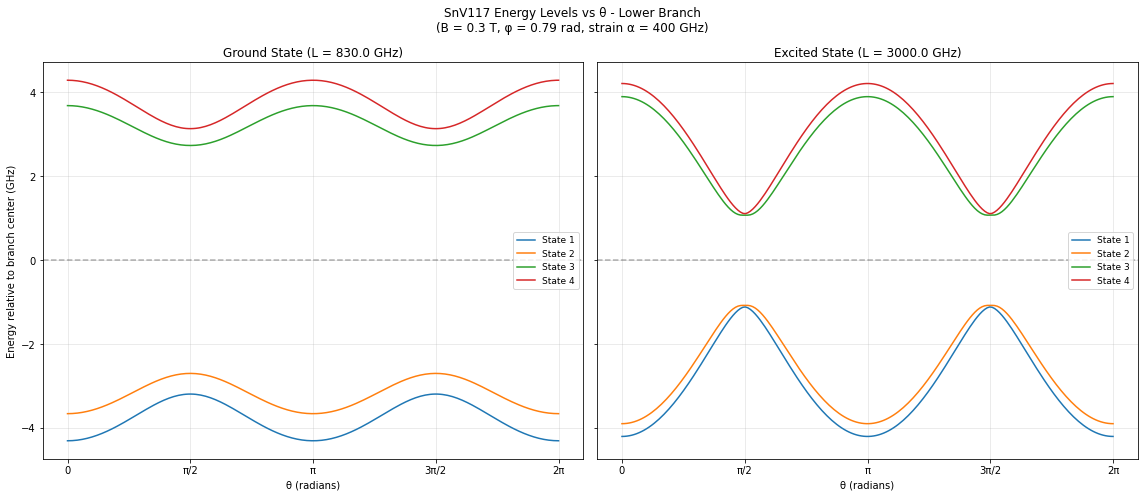

Ground state branch center: -576.390 GHz
Excited state branch center: -1552.417 GHz


In [5]:
# Plot theta sweep - ground and excited states side by side
# Select 4 lowest states (lower orbital branch) for each at theta=0
lower_gnd_indices_theta = np.argsort(E_gnd_theta[0, :])[:4]
lower_exc_indices_theta = np.argsort(E_exc_theta[0, :])[:4]

# Extract the lower branch energies
E_gnd_lower_theta = E_gnd_theta[:, lower_gnd_indices_theta]
E_exc_lower_theta = E_exc_theta[:, lower_exc_indices_theta]

# Center at the branch center frequency (mean of the 4 states at theta=0)
gnd_center_theta = np.mean(E_gnd_lower_theta[0, :])
exc_center_theta = np.mean(E_exc_lower_theta[0, :])

E_gnd_centered_theta = E_gnd_lower_theta - gnd_center_theta
E_exc_centered_theta = E_exc_lower_theta - exc_center_theta

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7), sharey=True)

# Ground state plot (centered)
for i in range(4):
    ax1.plot(thetas, E_gnd_centered_theta[:, i], '-', linewidth=1.5, label=f'State {lower_gnd_indices_theta[i]+1}')
ax1.set_xlabel('θ (radians)')
ax1.set_ylabel('Energy relative to branch center (GHz)')
ax1.set_title(f'Ground State (L = {params.L} GHz)')
ax1.legend(loc='best', fontsize=9)
ax1.grid(True, alpha=0.3)
ax1.axhline(y=0, color='k', linestyle='--', alpha=0.3)
ax1.set_xticks([0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi])
ax1.set_xticklabels(['0', 'π/2', 'π', '3π/2', '2π'])

# Excited state plot (centered)
for i in range(4):
    ax2.plot(thetas, E_exc_centered_theta[:, i], '-', linewidth=1.5, label=f'State {lower_exc_indices_theta[i]+1}')
ax2.set_xlabel('θ (radians)')
ax2.set_title(f'Excited State (L = {params.L_exc} GHz)')
ax2.legend(loc='best', fontsize=9)
ax2.grid(True, alpha=0.3)
ax2.axhline(y=0, color='k', linestyle='--', alpha=0.3)
ax2.set_xticks([0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi])
ax2.set_xticklabels(['0', 'π/2', 'π', '3π/2', '2π'])

fig.suptitle(f'SnV117 Energy Levels vs θ - Lower Branch\n(B = {B_fixed_Tesla} T, φ = {phi_fixed:.2f} rad, strain α = {alpha_theta} GHz)', fontsize=12)
plt.tight_layout()
plt.show()

print(f"Ground state branch center: {gnd_center_theta:.3f} GHz")
print(f"Excited state branch center: {exc_center_theta:.3f} GHz")
